<h2 align=center>Exploratory Data Analysis With Python and Pandas</h2>
<img src="logo.png">

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from ydata_profiling import ProfileReport

Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Task 1: Initial Data Exploration

In [2]:
df = pd.read_csv("supermarket_sales.csv")
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.tail(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.291,69.111,2/22/19,15:33,Cash,65.82,4.761905,3.291,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,2/18/19,13:28,Cash,618.38,4.761905,30.919,6.6
1000,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,2/18/19,13:28,Cash,618.38,4.761905,30.919,6.6
1001,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,3/10/19,20:46,Ewallet,116.06,4.761905,5.803,8.8
1002,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,1/26/19,15:17,Cash,609.56,4.761905,30.478,5.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1003 non-null   object 
 1   Branch                   1003 non-null   object 
 2   City                     1003 non-null   object 
 3   Customer type            924 non-null    object 
 4   Gender                   1003 non-null   object 
 5   Product line             960 non-null    object 
 6   Unit price               996 non-null    float64
 7   Quantity                 983 non-null    float64
 8   Tax 5%                   1003 non-null   float64
 9   Total                    1003 non-null   float64
 10  Date                     1003 non-null   object 
 11  Time                     1003 non-null   object 
 12  Payment                  1003 non-null   object 
 13  cogs                     1003 non-null   float64
 14  gross margin percentage 

In [5]:
 df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,996.000000,983.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,1003.000000,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,308.007358,4.761905e+00,15.400368,6.972682
std,26.510165,2.924673,11.715192,246.019028,234.303836,8.886215e-16,11.715192,1.717647
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.125000,3.000000,5.894750,123.789750,117.895000,4.761905e+00,5.894750,5.500000
50%,55.420000,5.000000,12.096000,254.016000,241.920000,4.761905e+00,12.096000,7.000000
75%,78.085000,8.000000,22.539500,473.329500,450.790000,4.761905e+00,22.539500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


In [6]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [7]:
df['DateTime'] = df['Date'].astype(str) + ' ' + df['Time'].astype(str)


In [8]:
df.drop(columns = ['Date', 'Time'], axis = 1, inplace = True)

In [9]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [10]:
df.set_index(df['DateTime'], inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1003 entries, 2019-01-05 13:08:00 to 2019-01-26 15:17:00
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1003 non-null   object        
 1   Branch                   1003 non-null   object        
 2   City                     1003 non-null   object        
 3   Customer type            924 non-null    object        
 4   Gender                   1003 non-null   object        
 5   Product line             960 non-null    object        
 6   Unit price               996 non-null    float64       
 7   Quantity                 983 non-null    float64       
 8   Tax 5%                   1003 non-null   float64       
 9   Total                    1003 non-null   float64       
 10  Payment                  1003 non-null   object        
 11  cogs                     1003 non-null   float64       
 12

In [12]:
df['DateTime']

DateTime
2019-01-05 13:08:00   2019-01-05 13:08:00
2019-03-08 10:29:00   2019-03-08 10:29:00
2019-03-03 13:23:00   2019-03-03 13:23:00
2019-01-27 20:33:00   2019-01-27 20:33:00
2019-02-08 10:37:00   2019-02-08 10:37:00
                              ...        
2019-02-22 15:33:00   2019-02-22 15:33:00
2019-02-18 13:28:00   2019-02-18 13:28:00
2019-02-18 13:28:00   2019-02-18 13:28:00
2019-03-10 20:46:00   2019-03-10 20:46:00
2019-01-26 15:17:00   2019-01-26 15:17:00
Name: DateTime, Length: 1003, dtype: datetime64[ns]

In [13]:
df.isnull().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  7
Quantity                   20
Tax 5%                      0
Total                       0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
DateTime                    0
dtype: int64

In [14]:
# Exclude 'Date' column, then sum both numeric and object columns
df.drop(columns=['DateTime']).duplicated()

DateTime
2019-01-05 13:08:00    False
2019-03-08 10:29:00    False
2019-03-03 13:23:00    False
2019-01-27 20:33:00    False
2019-02-08 10:37:00    False
                       ...  
2019-02-22 15:33:00    False
2019-02-18 13:28:00    False
2019-02-18 13:28:00     True
2019-03-10 20:46:00     True
2019-01-26 15:17:00     True
Length: 1003, dtype: bool

In [15]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,DateTime
DateTime,,,,,,,,,,,,,,,,
2019-01-05 13:08:00,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00
2019-03-08 10:29:00,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00
2019-03-03 13:23:00,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00
2019-01-27 20:33:00,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00
2019-02-08 10:37:00,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00


In [16]:
df.drop('DateTime', axis = 1, inplace = True)

In [17]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1003 entries, 2019-01-05 13:08:00 to 2019-01-26 15:17:00
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1003 non-null   object 
 1   Branch                   1003 non-null   object 
 2   City                     1003 non-null   object 
 3   Customer type            924 non-null    object 
 4   Gender                   1003 non-null   object 
 5   Product line             960 non-null    object 
 6   Unit price               996 non-null    float64
 7   Quantity                 983 non-null    float64
 8   Tax 5%                   1003 non-null   float64
 9   Total                    1003 non-null   float64
 10  Payment                  1003 non-null   object 
 11  cogs                     1003 non-null   float64
 12  gross margin percentage  1003 non-null   float64
 13  gross income             1003 non-null   f

### Task 2: Univariate Analysis

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

In [19]:
!pip install --upgrade pandas seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [20]:
skewness = df['Rating'].skew()
print(f"Skewness of the Rating distribution: {skewness}")


Skewness of the Rating distribution: 0.009592348980681047


**Question 2:** Do aggregate sales numbers differ by much between branches?

In [21]:
aggregate_sales = df.groupby('Branch')['Total'].sum().reset_index()

# Display the result
print(aggregate_sales)

  Branch        Total
0      A  106971.5325
1      B  106837.7100
2      C  110568.7065


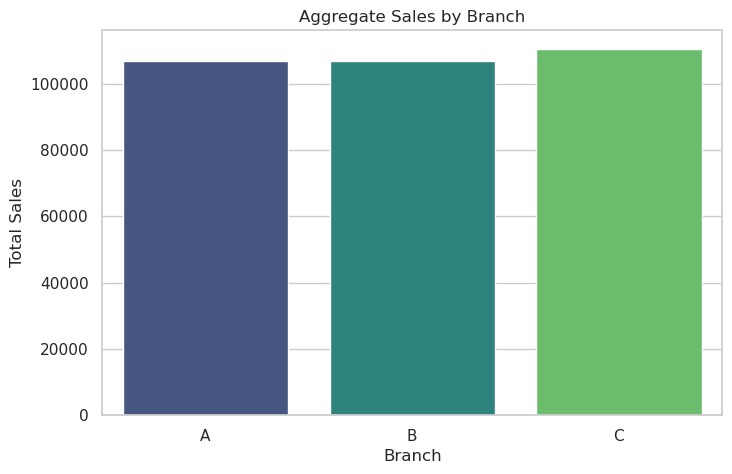

In [22]:
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Branch', y='Total', data=aggregate_sales, palette='viridis')

# Add title and labels
plt.title('Aggregate Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')

# Show the plot
plt.show()

### Task 3: Bivariate Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1003 entries, 2019-01-05 13:08:00 to 2019-01-26 15:17:00
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1003 non-null   object 
 1   Branch                   1003 non-null   object 
 2   City                     1003 non-null   object 
 3   Customer type            924 non-null    object 
 4   Gender                   1003 non-null   object 
 5   Product line             960 non-null    object 
 6   Unit price               996 non-null    float64
 7   Quantity                 983 non-null    float64
 8   Tax 5%                   1003 non-null   float64
 9   Total                    1003 non-null   float64
 10  Payment                  1003 non-null   object 
 11  cogs                     1003 non-null   float64
 12  gross margin percentage  1003 non-null   float64
 13  gross income             1003 non-null   f

**Question 4:** Is there a noticeable time trend in gross income?

<AxesSubplot: xlabel='Rating', ylabel='gross income'>

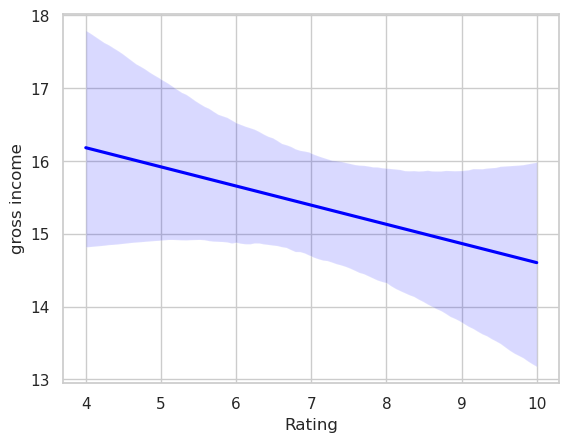

In [24]:
sns.regplot(x='Rating', y='gross income', data=df, scatter=False, color='blue')

<AxesSubplot: xlabel='Rating', ylabel='gross income'>

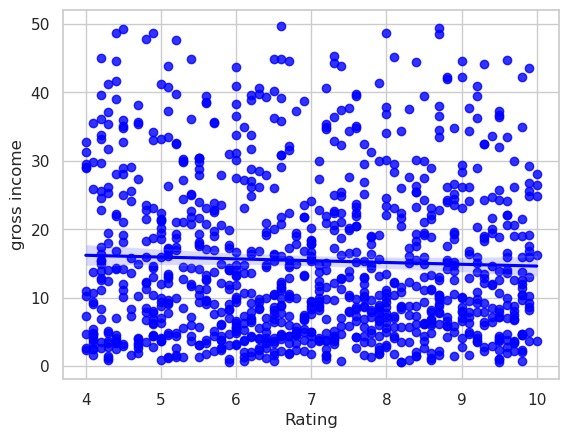

In [25]:
sns.regplot(x='Rating', y='gross income', data=df, scatter=True, color='blue')

<AxesSubplot: xlabel='Rating', ylabel='gross income'>

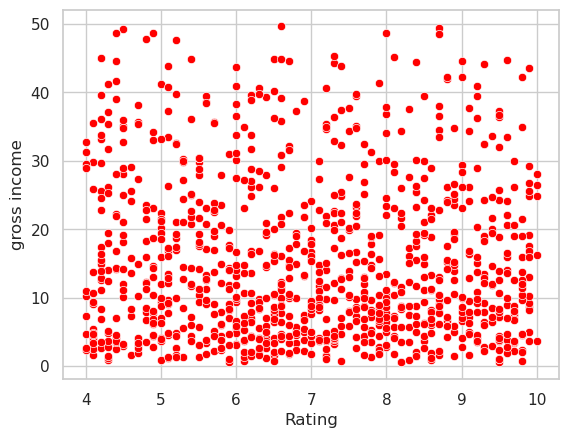

In [26]:
sns.scatterplot(x='Rating', y='gross income', data=df, color='red')

### Task 4: Dealing With Duplicate Rows and Missing Values

In [27]:
df['Customer type'].fillna('Unknown', inplace=True)
df['Product line'].fillna(df['Product line'].mode()[0], inplace=True)
df['Unit price'].fillna(df['Unit price'].mean(), inplace=True)
df['Quantity'].fillna(df['Quantity'].median(), inplace=True)


In [28]:
print(df.isnull().sum())


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [29]:
# Handling missing values
df['Customer type'].fillna(df['Customer type'].mode()[0], inplace=True)
df['Product line'].fillna(df['Product line'].mode()[0], inplace=True)
df['Unit price'].fillna(df['Unit price'].mean(), inplace=True)
df['Quantity'].fillna(df['Quantity'].median(), inplace=True)

# Handling duplicates
df.drop_duplicates(inplace=True)

# Check the result
print(df.isnull().sum())
print(df.duplicated().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64
0


### Task 5: Correlation Analysis

Non-numeric columns: Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Payment'],
      dtype='object')
                         Unit price  Quantity    Tax 5%     Total      cogs  \
Unit price                 1.000000  0.015284  0.629029  0.629029  0.629029   
Quantity                   0.015284  1.000000  0.704273  0.704273  0.704273   
Tax 5%                     0.629029  0.704273  1.000000  1.000000  1.000000   
Total                      0.629029  0.704273  1.000000  1.000000  1.000000   
cogs                       0.629029  0.704273  1.000000  1.000000  1.000000   
gross margin percentage         NaN       NaN       NaN       NaN       NaN   
gross income               0.629029  0.704273  1.000000  1.000000  1.000000   
Rating                    -0.006604 -0.022031 -0.036442 -0.036442 -0.036442   

                         gross margin percentage  gross income    Rating  
Unit price                                   NaN      0.629029 -0.006

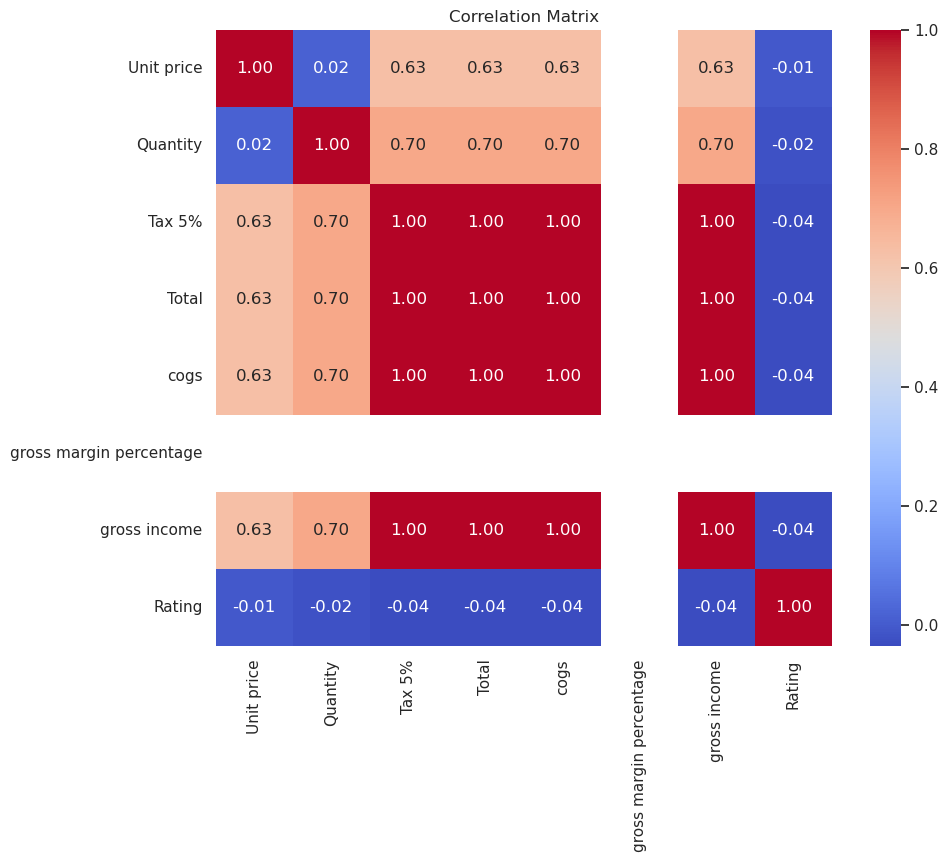

In [30]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Display non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

# If needed, convert columns to numeric (use errors='coerce' to turn non-convertible values to NaN)
# Example for a specific column, uncomment if needed:
# df['some_column'] = pd.to_numeric(df['some_column'], errors='coerce')

# Handle missing values (you can choose to drop or fill them)
numeric_df = numeric_df.dropna()  # Drop rows with NaN values

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Set the style of seaborn
sns.set(style="white")

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [31]:
!pip install sweetviz


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [32]:
import sweetviz as sv

# Load your dataset
df = pd.read_csv('supermarket_sales.csv')

# Create a Sweetviz report
report = sv.analyze(df)

# Show the report
report.show_html('sweetviz_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Helpful Links

1. More visualizations: https://www.data-to-viz.com/
2. Seaborn gallery: https://seaborn.pydata.org/examples/index.html
3. Pandas profiling documentation: https://pypi.org/project/pandas-profiling/